In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [2]:
IMAGE_SIZE = 256
CHANNELS = 3
BATCH_SIZE = 32

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '/Users/sagyanniraula/AI/FairFace Race/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="categorical",

)

Found 86744 images belonging to 7 classes.


In [4]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.3986941  0.0120529  0.03618059]
  [0.6429518  0.10022056 0.11812285]
  [0.8717747  0.29056397 0.27028787]
  ...
  [0.06666667 0.02352941 0.03921569]
  [0.06666667 0.02352941 0.03921569]
  [0.06666667 0.02352941 0.03921569]]

 [[0.38224986 0.00982318 0.03311471]
  [0.6239991  0.08739962 0.10781036]
  [0.85978985 0.27579203 0.25858176]
  ...
  [0.06572741 0.02446868 0.03921569]
  [0.06544869 0.02474739 0.03921569]
  [0.06516998 0.02502611 0.03921569]]

 [[0.36580563 0.00759345 0.03004883]
  [0.60504645 0.07457867 0.09749786]
  [0.8478051  0.2610201  0.2468757 ]
  ...
  [0.06088641 0.02838033 0.03921569]
  [0.06032898 0.02865904 0.03921569]
  [0.05977155 0.02893776 0.03921569]]

 ...

 [[0.3043956  0.2769446  0.24557206]
  [0.3046743  0.27722332 0.24585077]
  [0.304953   0.27750203 0.24612948]
  ...
  [0.37925866 0.2578942  0.21568629]
  [0.37050602 0.26478815 0.21568629]
  [0.3597103  0.26963907 0.21568629]]

 [[0.29860777 0.2711568  0.23978423]
  [0.2977716  0.27032062 0.23894808]


In [5]:
train_generator.class_indices

{'Black': 0,
 'East Asian': 1,
 'Indian': 2,
 'Latino_Hispanic': 3,
 'Middle Eastern': 4,
 'Southeast Asian': 5,
 'White': 6}

In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['Black',
 'East Asian',
 'Indian',
 'Latino_Hispanic',
 'Middle Eastern',
 'Southeast Asian',
 'White']

In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        '/Users/sagyanniraula/AI/FairFace Race/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode="categorical"
)

Found 10954 images belonging to 7 classes.


In [8]:
n_classes = 7

input_shape = ( IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),  # Changed to softmax for categorical classification
])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,975 (1.33 MB)

 Trainable params: 347,975 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
loss_fn = tf.keras.losses.CategoricalCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction='sum_over_batch_size',
    name='categorical_crossentropy'
)

model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [11]:
history=model.fit(
    train_generator,
    batch_size =32,
    validation_data=validation_generator,
      verbose=1,
    epochs=15,
)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 1641s 605ms/step - accuracy: 0.2510 - loss: 1.8606 - val_accuracy: 0.3544 - val_loss: 1.6624
Epoch 2/15
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 1641s 605ms/step - accuracy: 0.3888 - loss: 1.5785 - val_accuracy: 0.4607 - val_loss: 1.4031
Epoch 3/15
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 1646s 607ms/step - accuracy: 0.4556 - loss: 1.3994 - val_accuracy: 0.4869 - val_loss: 1.3414
Epoch 4/15
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 1641s 605ms/step - accuracy: 0.4892 - loss: 1.3223 - val_accuracy: 0.4927 - val_loss: 1.3125
Epoch 5/15
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 1643s 606ms/step - accuracy: 0.5110 - loss: 1.2678 - val_accuracy: 0.5184 - val_loss: 1.2478
Epoch 6/15
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 1666s 614ms/step - accuracy: 0.5264 - loss: 1.2343 - val_accuracy: 0.5236 - val_loss: 1.2364
Epoch 7/15
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 1639s 605ms/step - accuracy: 0.5336 - loss: 1.2088 - val_accuracy: 0.4992 - val_loss: 1.2821
Epoch 8/15
2711/2711 ━━━━━━━━━━━━━━━━━━━━ 1663s 613ms/s

In [12]:
scores = model.evaluate(train_generator)

2711/2711 ━━━━━━━━━━━━━━━━━━━━ 680s 251ms/step - accuracy: 0.5702 - loss: 1.1049


In [13]:
scores

[1.1004329919815063, 0.5738725662231445]

In [14]:
history

In [15]:
history.params

{'verbose': 1, 'epochs': 15, 'steps': 2711}

In [16]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [17]:
type(history.history['loss'])

list

In [18]:
len(history.history['loss'])

15

In [19]:
history.history['loss'][:10]

[1.7980515956878662,
 1.5187174081802368,
 1.379390835762024,
 1.3132599592208862,
 1.2646397352218628,
 1.2340863943099976,
 1.2084438800811768,
 1.1866974830627441,
 1.1736348867416382,
 1.1615504026412964]

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [21]:
val_acc

[0.35439109802246094,
 0.4606536328792572,
 0.48694542050361633,
 0.49269673228263855,
 0.5184407234191895,
 0.5236443281173706,
 0.49917837977409363,
 0.5471973419189453,
 0.5325908064842224,
 0.5540441870689392,
 0.5503925681114197,
 0.5434544682502747,
 0.5587912797927856,
 0.5608909726142883,
 0.5580610036849976]

In [22]:
acc

[0.29093655943870544,
 0.4118555784225464,
 0.4651733934879303,
 0.4931522607803345,
 0.5113667845726013,
 0.5246933698654175,
 0.5349764823913574,
 0.5415936708450317,
 0.5489025115966797,
 0.5526837706565857,
 0.5580328106880188,
 0.5621945261955261,
 0.5650650262832642,
 0.5697108507156372,
 0.5707714557647705]

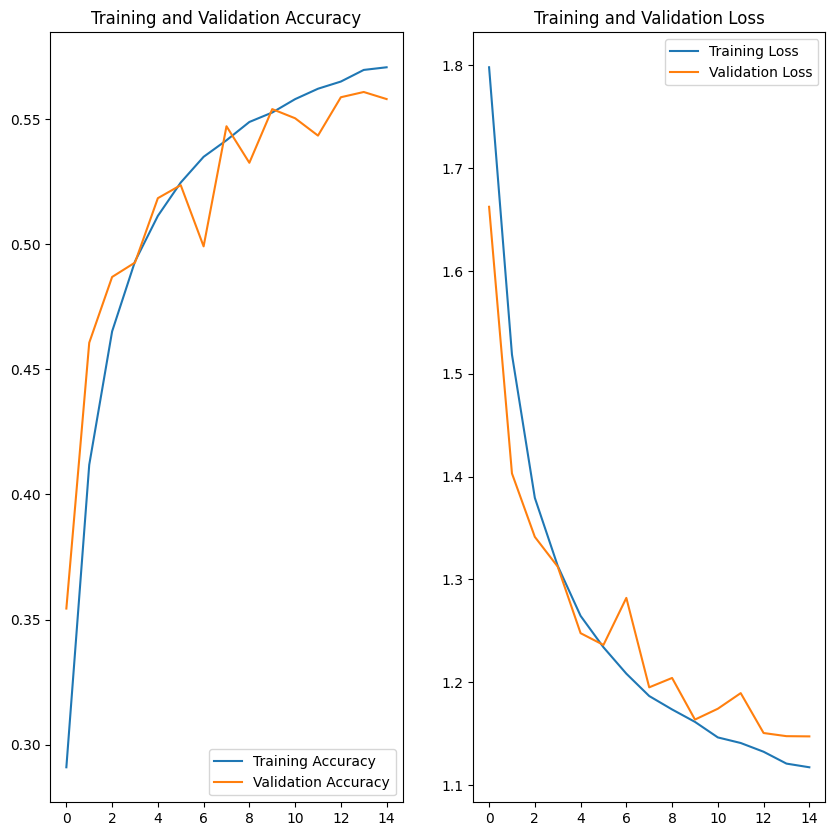

In [23]:


EPOCHS = 15

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(EPOCHS), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), history.history['loss'], label='Training Loss')
plt.plot(range(EPOCHS), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


First image to predict:


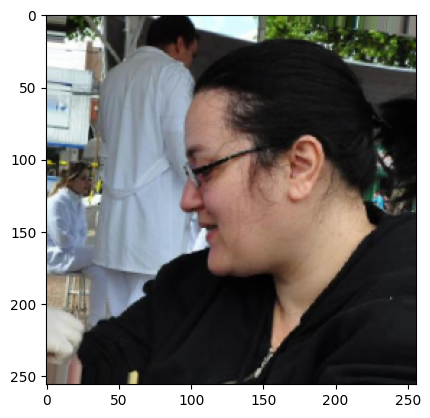

Actual label: White
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
Predicted label: White


In [24]:

import numpy as np
import matplotlib.pyplot as plt

for image_batch, label_batch in train_generator:
    first_image = image_batch[0]
    first_label_index = np.argmax(label_batch[0])  # Get the index of the first label
    first_label = class_names[first_label_index]  # Convert the index to the original label

    print("First image to predict:")
    plt.imshow(first_image)
    plt.show()  # Added to display the image
    print("Actual label:", first_label)
    
    batch_prediction = model.predict(image_batch)
    predicted_label_index = np.argmax(batch_prediction[0])  # Get the index of the predicted label
    predicted_label = class_names[predicted_label_index]  # Convert the index to the original label
    print("Predicted label:", predicted_label)
    
    break


In [25]:
def predict(model, img, class_names):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class_index = np.argmax(predictions[0])
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class_index, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


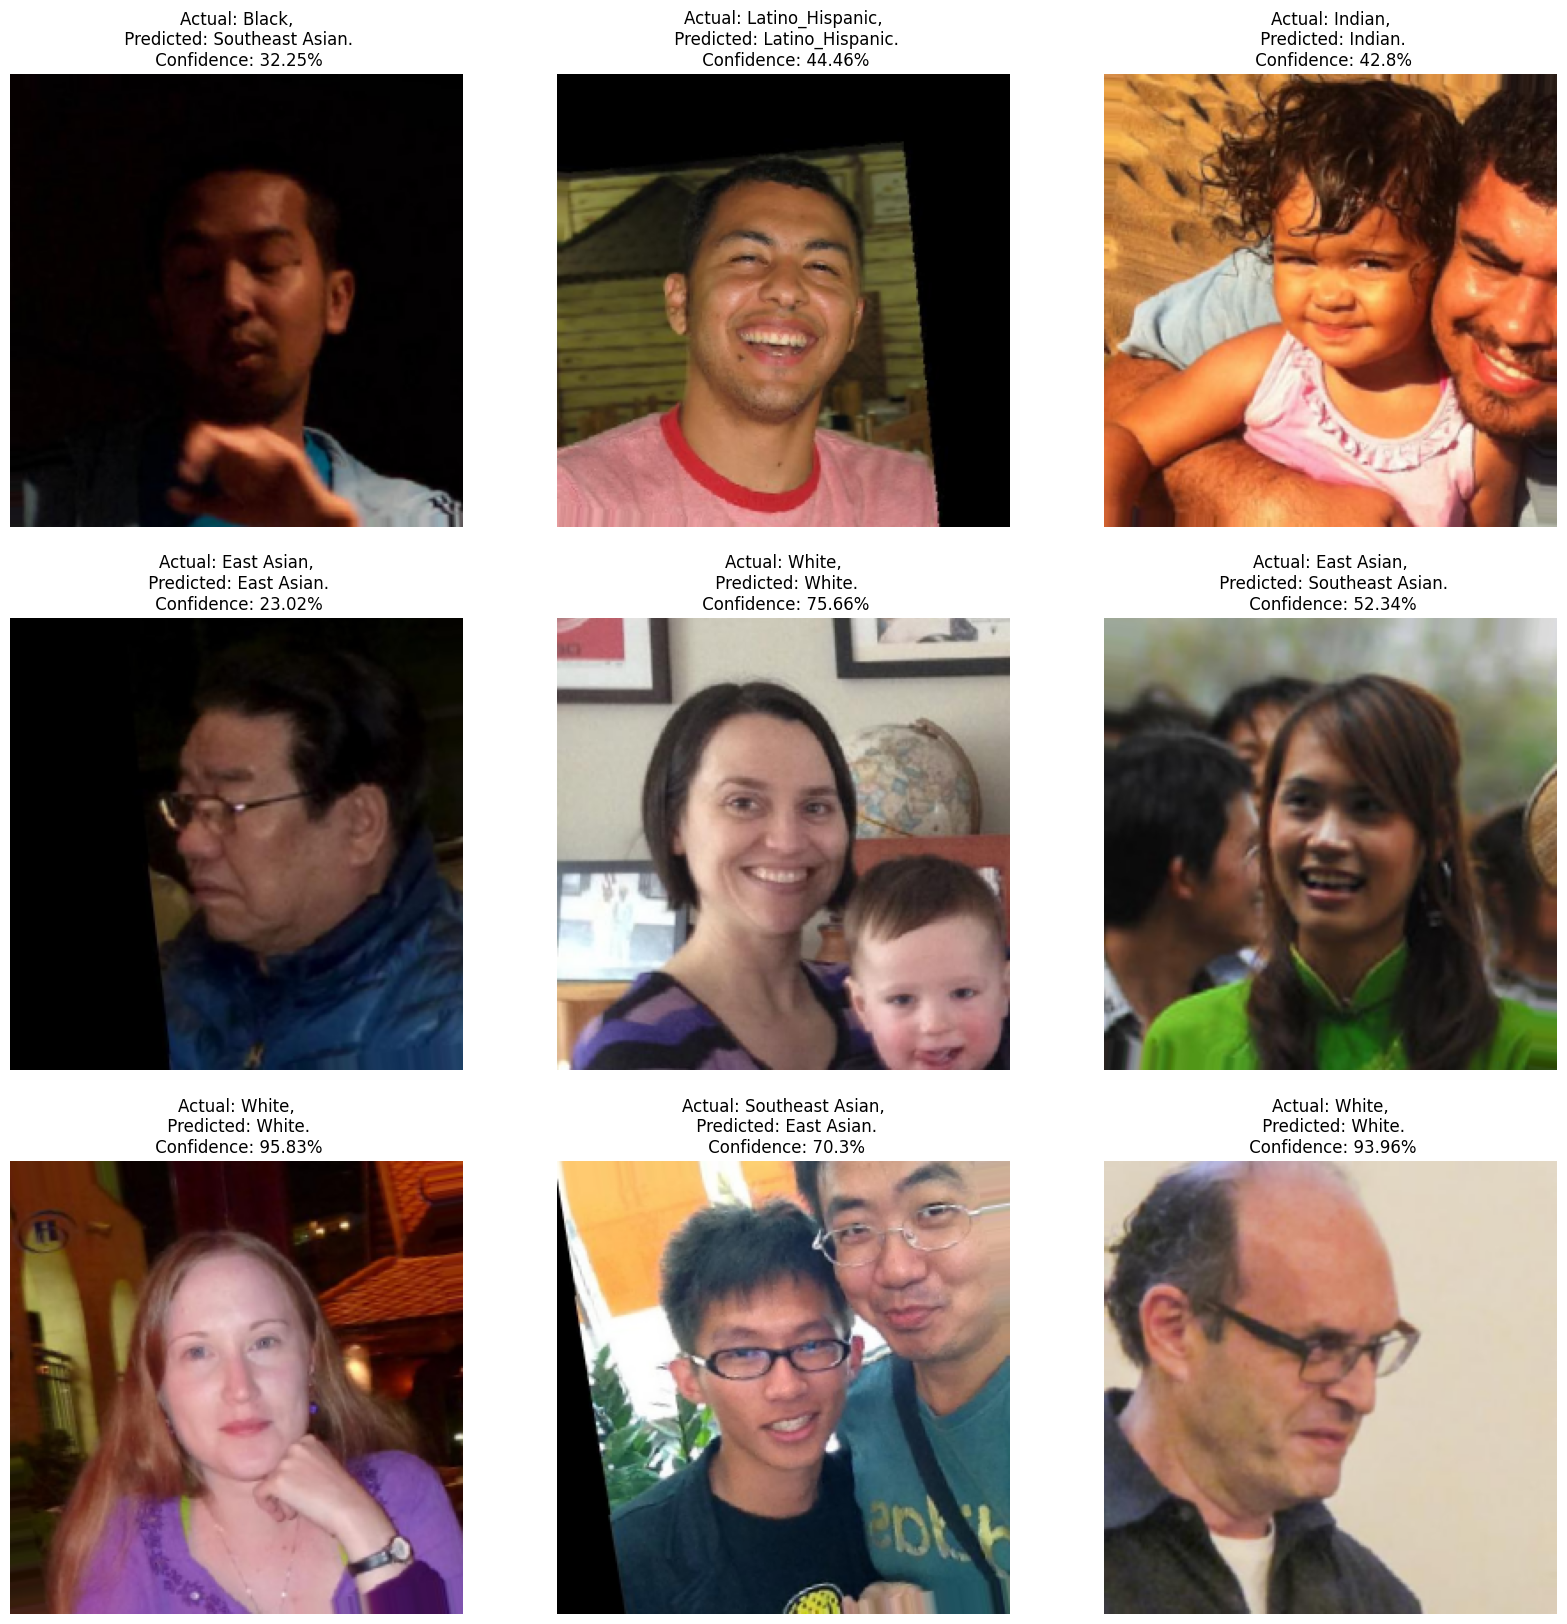

In [30]:
plt.figure(figsize=(20, 20))
for images, labels in train_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class_index, confidence = predict(model, images[i], class_names)
        predicted_class = class_names[predicted_class_index]
        actual_class = class_names[np.argmax(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    
    break  # Exit the loop after the first batch
    
plt.show()



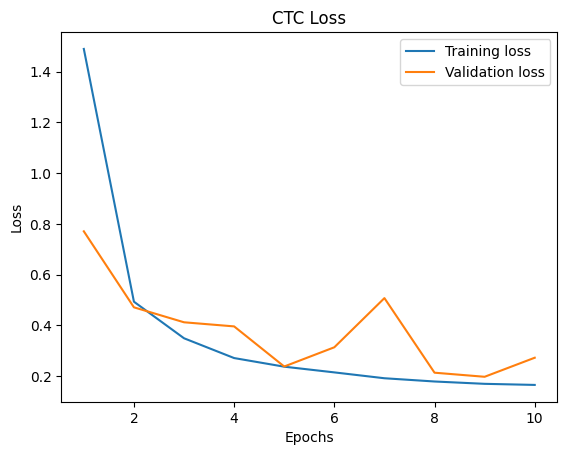

In [27]:
import matplotlib.pyplot as plt

epochs = range(1, 11)  # Assuming 10 epochs
train_losses = [1.4896, 0.4932, 0.3490, 0.2710, 0.2370, 0.2145, 0.1914, 0.1786, 0.1694, 0.1651]
val_losses = [0.7706, 0.4710, 0.4120, 0.3958, 0.2377, 0.3135, 0.5073, 0.2133, 0.1972, 0.2723]

plt.plot(epochs, train_losses, label='Training loss')
plt.plot(epochs, val_losses, label='Validation loss')
plt.title('CTC Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [28]:
model.save('demographic_model.h5')